In [5]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import lightgbm as lgb
from config import MODELS_DIR

In [6]:

# Load validation data
X_val = joblib.load(MODELS_DIR / "X_val.pkl")
y_val = joblib.load(MODELS_DIR / "y_val.pkl")



In [7]:
# Load preprocessor to get feature names
preprocessor = joblib.load(MODELS_DIR / "preprocessor.pkl")
feature_names = preprocessor.get_feature_names_out()

# Convert X_val to DataFrame for SHAP
X_val_df = pd.DataFrame(X_val, columns=feature_names)


In [8]:
# Load XGBoost model
xgb = joblib.load(MODELS_DIR / "xgb_fraud_model_tuned.pkl")



In [9]:
# SHAP Explainer
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_val_df)



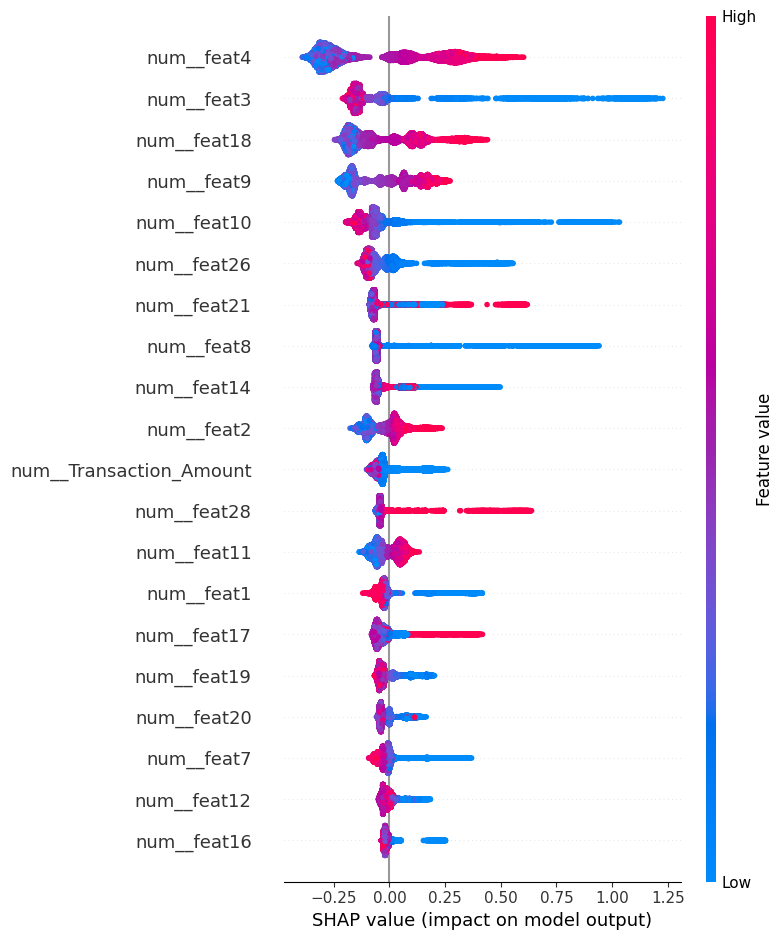

In [10]:
# Summary Plot
plt.figure()
shap.summary_plot(shap_values, X_val_df)



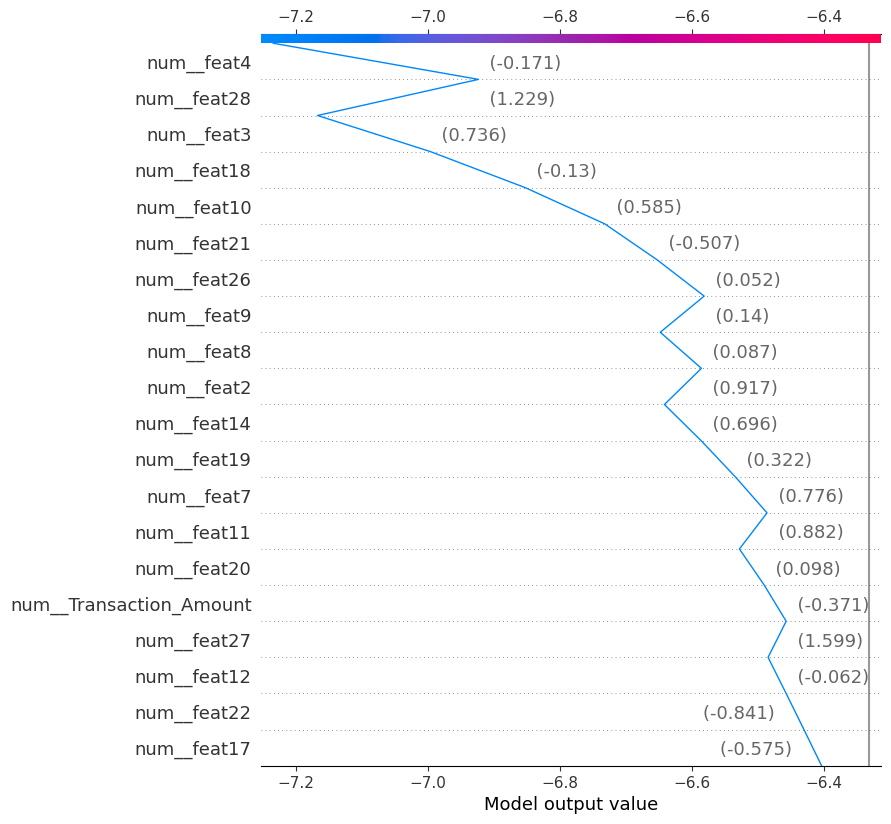

In [12]:
# Force Plot for a single sample
sample_idx = 10

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    X_val_df.iloc[sample_idx]
)
# Decision Plot
shap.decision_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    X_val_df.iloc[sample_idx]
)


In [13]:
# Save SHAP values
joblib.dump(shap_values, MODELS_DIR / "shap_values.pkl")
print("Saved SHAP values.")

Saved SHAP values.
